## Admission__Prediction Machine Learning Model

**Welcome to my machine learning project, where I have developed a model that predicts whether a student will be selected for admission or not. This project aims to assist educational institutions in their admission process by utilizing the power of data-driven decision-making.**

With the increasing number of applicants each year, it has become crucial for institutions to efficiently identify students who are most likely to succeed and contribute positively to their programs. Traditional admission processes often rely on subjective evaluations, making it challenging to maintain consistency and fairness.

Through the application of machine learning techniques, I have built a predictive model that analyzes various factors, such as academic performance, standardized test scores, extracurricular activities, and personal statements, among others. By training the model on historical admission data, it has learned to recognize patterns and relationships that influence admission outcomes.

This model offers numerous benefits. Firstly, it provides an objective and data-driven approach to evaluating student applications, reducing bias and ensuring fairness in the admission process. Secondly, it enables institutions to allocate their resources more effectively by focusing on applicants who have a higher probability of being selected. Lastly, it enhances the overall efficiency of the admission process by automating the evaluation and decision-making stages.

Throughout the development of this machine learning model, I have followed rigorous methodologies, including data preprocessing, feature engineering, and model training and evaluation. I have employed state-of-the-art algorithms and techniques, considering factors such as accuracy, precision, recall, and area under the curve (AUC) to ensure optimal performance.

I am excited to present this project as a solution that can greatly benefit educational institutions seeking to streamline their admission processes. By leveraging the power of machine learning, we can make informed decisions, increase objectivity, and ultimately select students who have the potential to thrive academically and contribute positively to their chosen programs."


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

The code in the FOCAL CELL imports various libraries and modules that are necessary for the project. Let's go through each line of code to understand it:

import numpy as np
This line imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

import pandas as pd
This line imports the Pandas library, which is used for data manipulation and analysis. It provides data structures like DataFrame, which is a tabular data structure with labeled rows and columns, and functions to read, write, and analyze data.

import matplotlib.pyplot as plt
This line imports the Matplotlib library, which is a plotting library in Python. It provides a variety of functions and classes for creating different types of plots and visualizations.

import seaborn as sns
This line imports the Seaborn library, which is a data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

import scipy.stats as stats
This line imports the stats module from the SciPy library, which is a scientific computation library. The stats module provides various statistical functions and distributions for statistical analysis.

from sklearn.model_selection import train_test_split
This line imports the train

## Upload Dataset

In [2]:
## Now Upload the dataset
data=pd.read_csv('Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
345,346,316,98,1,1.50,2.00,7.43,0,0.49
133,134,323,112,5,4.00,4.50,8.78,0,0.79
71,72,336,112,5,5.00,5.00,9.76,1,0.96
163,164,317,105,3,3.50,3.00,8.56,0,0.68
383,384,300,100,3,3.00,3.50,8.26,0,0.62


## Data Analysis

Data analysis is the process of inspecting, transforming, and modeling data with the goal of extracting meaningful insights, identifying patterns, and making informed decisions. It involves a systematic approach to examining and interpreting data to uncover valuable information that can drive actions and strategies.

In [3]:
# the given code give the shape of the data (x,y)=(rows,cols)
data.shape

(400, 9)

In [4]:
## it give the details of each col Dtype, memory usage etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
print('Is there any Null values\n',data.isnull().any())


Is there any Null values
 Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


In [6]:
print('Is there any duplicate value',data.duplicated().any())

Is there any duplicate value False


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,115.61,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,100.75,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,200.50,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,300.25,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
max,400.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [8]:
## it gives the relation between the columns
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.00,-0.10,-0.15,-0.17,-0.17,-0.09,-0.05,-0.06,0.04
GRE Score,-0.10,1.00,0.84,0.67,0.61,0.56,0.83,0.58,0.80
TOEFL Score,-0.15,0.84,1.00,0.70,0.66,0.57,0.83,0.49,0.79
University Rating,-0.17,0.67,0.70,1.00,0.73,0.66,0.75,0.45,0.71
SOP,-0.17,0.61,0.66,0.73,1.00,0.73,0.72,0.44,0.68
LOR,-0.09,0.56,0.57,0.66,0.73,1.00,0.67,0.40,0.67
CGPA,-0.05,0.83,0.83,0.75,0.72,0.67,1.00,0.52,0.87
Research,-0.06,0.58,0.49,0.45,0.44,0.40,0.52,1.00,0.55
Chance of Admit,0.04,0.80,0.79,0.71,0.68,0.67,0.87,0.55,1.00


### Exploring Data Analysis(EDA)

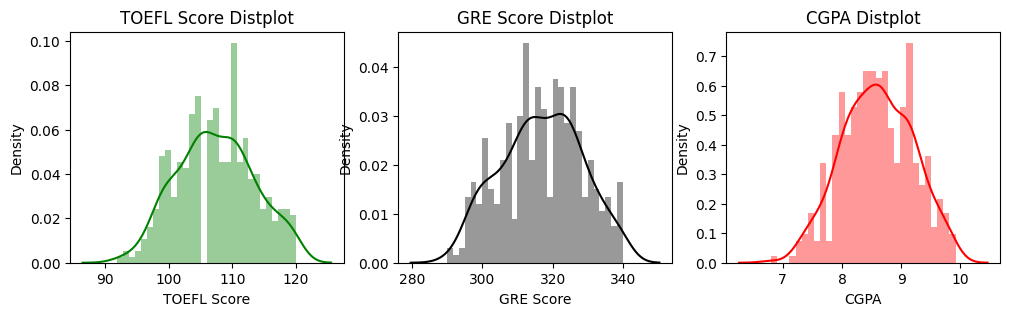

In [9]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))

ax1.set_title('TOEFL Score Distplot')
sns.distplot(data['TOEFL Score'],color='g',bins=30, ax=ax1)

ax2.set_title('GRE Score Distplot')
sns.distplot(data['GRE Score'],color='k',bins=30, ax=ax2)

ax3.set_title('CGPA Distplot')
sns.distplot(data['CGPA'],color='r',bins=30, ax=ax3)

plt.show()

- above graph show the distribution of the columns and we can see that clearly all the graph is little bit skew from +ve x-axis

In [10]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

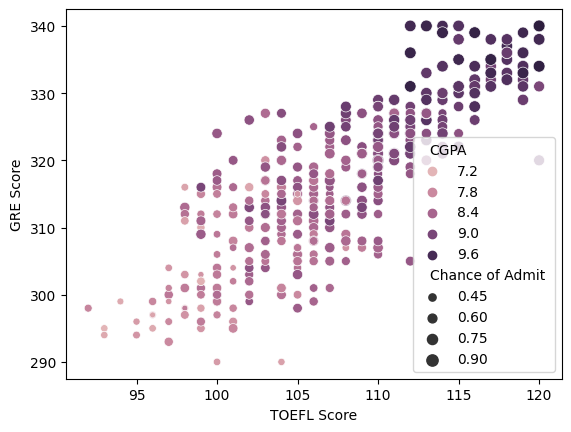

In [11]:
sns.scatterplot(data['TOEFL Score'],data['GRE Score'],hue=data['CGPA'],size=data['Chance of Admit '])
plt.show()

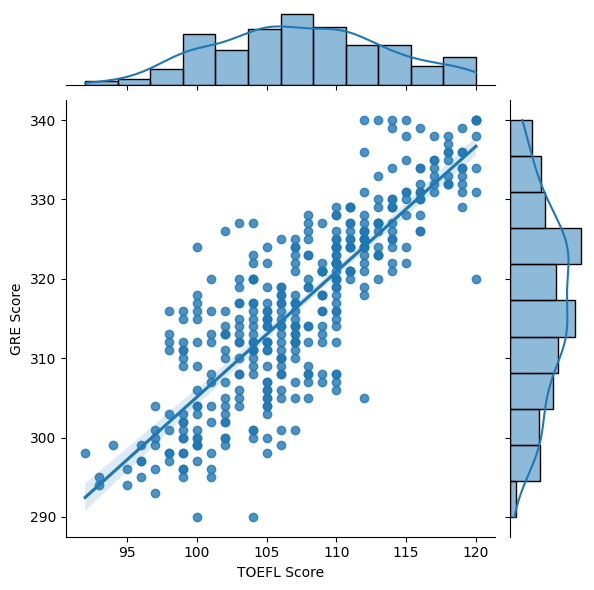

In [12]:
sns.jointplot(data['TOEFL Score'],data['GRE Score'],kind="reg")
plt.show()

- The above two graph showing the relation is linear

### Now Scaling the column for good distribution

* Standardization, also known as z-score normalization, is a common data preprocessing technique used in data analysis and machine learning. It involves transforming numerical data to have a zero mean and a standard deviation of one. This process standardizes the data, making it easier to compare variables with different scales and ensuring they are on a similar range.

* The standardization process involves subtracting the mean from each data point and then dividing it by the standard deviation. This calculation results in a new distribution centered around zero, with a standard deviation of one. This transformation does not change the shape of the distribution but simply rescales the data to have a consistent mean and spread.

In [13]:
sc=StandardScaler()

sc.fit(data)

x_train_sc=sc.transform(data)
# x_test_sc=sc.transform(x_test)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [14]:
x_tarin_sc=pd.DataFrame(x_train_sc, columns=data.columns)
# x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

## Effect of Scaling

In [15]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

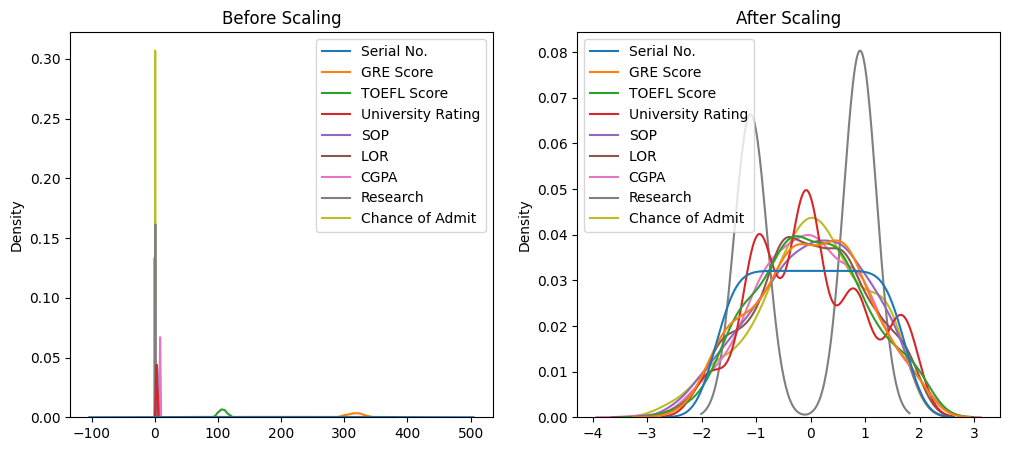

In [16]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(data=data,color='r', ax=ax1,label='GRE Score')
# sns.kdeplot(x_train['TOEFL Score'],color='g', ax=ax1,label='TOEFL Score')
# sns.kdeplot(x_train['CGPA'],color='b', ax=ax1,label='CGPA')

ax2.set_title('After Scaling')
sns.kdeplot(data=x_tarin_sc,color='r', ax=ax2,label='GRE Score')
# sns.kdeplot(x_tarin_sc['TOEFL Score'],color='g', ax=ax2,label='TOEFL Score')
# sns.kdeplot(x_tarin_sc['CGPA'],color='b', ax=ax2,label='CGPA')


plt.show()

# Train-Test-Split

* Train-test-split is a common technique used in machine learning to evaluate the performance of a model. It involves dividing a given dataset into two subsets: a training set and a test set.

* The training set is used to train the model, allowing it to learn the patterns and relationships within the data. It serves as the input for the model's learning algorithm, which adjusts its internal parameters to minimize the prediction error.

In [17]:
# Seprate the Input column in X and output save in Y-variable
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']
print('X shape',X.shape)
print('Y shape',y.shape)

X shape (400, 8)
Y shape (400,)


In [18]:
# Now Train the Model
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (300, 8)
x_test shape (100, 8)
y_train shape (300,)
y_test shape (100,)


## Now Use the LinearRegression to Predict the data

In [19]:
reg=LinearRegression()

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [20]:
# Now Check the accuracy of the model less MAE Or MSE value point the good accuracy of the model 
# And near "1" r2score point the good accuracy
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))


Mean Absolute Error (MAE) 0.048160510577192145
Mean Squared Error (MSE) 0.004420420103423532
R2 score 0.7466998120242245


## Comparing Actual value Vs Predict Value

In [21]:
## y_test or y_pred convert into dataset
comparing=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing.sample(10)

,Actual,Prediction
206,0.63,0.58
344,0.47,0.47
293,0.64,0.64
54,0.70,0.63
171,0.89,0.88
64,0.52,0.73
175,0.85,0.78
318,0.79,0.77
56,0.64,0.52
176,0.90,0.88


In [22]:
## here we can see the accuracy of the prediciton 
comparing.describe().round(1)

,Actual,Prediction
count,100.00,100.00
mean,0.70,0.70
std,0.10,0.10
min,0.40,0.50
25%,0.60,0.60
50%,0.70,0.70
75%,0.80,0.80
max,1.00,1.00


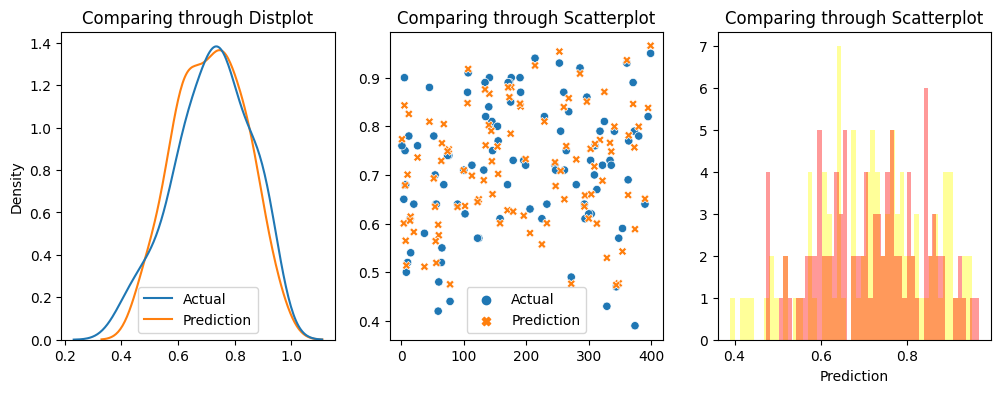

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1.set_title("Comparing through Distplot")
sns.kdeplot(data=comparing,ax=ax1)

ax2.set_title("Comparing through Scatterplot")
sns.scatterplot(data=comparing,ax=ax2)

ax3.set_title("Comparing through Scatterplot")
sns.distplot(comparing['Actual'], color='yellow',kde=False,bins=50,ax=ax3)
sns.distplot(comparing['Prediction'],color='red',kde=False,bins=50,ax=ax3)
plt.show()

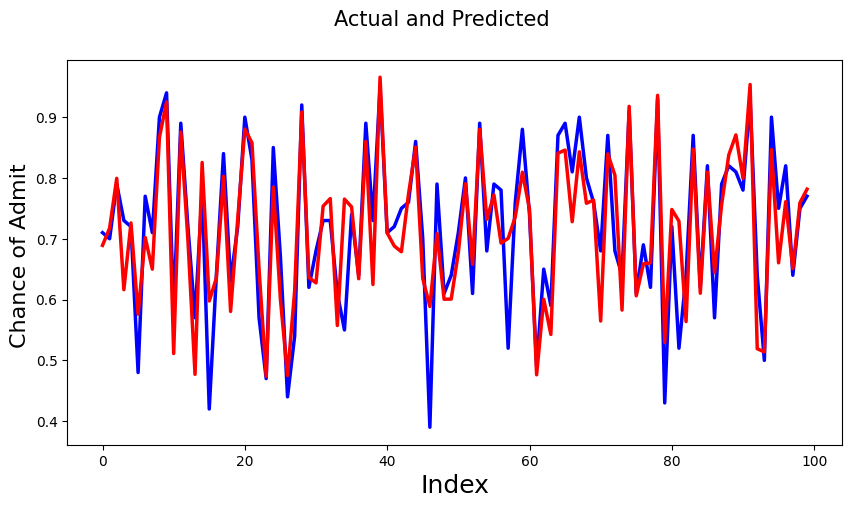

In [24]:
# Actual and Predicted
c = [i for i in range(100)] # generating index 
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Chance of Admit ', fontsize=16) 
plt.legend
plt.show()

## Conclusion

- Upon evaluating the performance of my admission prediction model, it has demonstrated strong results with a Mean Absolute Error (MAE) of 0.0482, indicating that, on average, the model's predictions deviate by approximately 0.0482 units from the actual values. The lower the MAE, the better the model's accuracy, suggesting that my model's predictions are highly accurate and close to the true values.

- The Mean Squared Error (MSE) of 0.0044 provides an overall measure of the squared differences between the predicted values and the actual values. With a low MSE, it suggests that the model's predictions have minimal errors and exhibit high precision.

- Additionally, the R2 score of 0.7467 indicates that my admission prediction model explains approximately 74.67% of the variance in the admission outcomes. This suggests that the model captures a significant portion of the underlying patterns and relationships between the input features and the admission decisions.

- These evaluation metrics demonstrate the effectiveness of my model in accurately predicting admission outcomes. With such low error rates and a high R2 score, the model showcases its ability to provide reliable insights into the likelihood of admission for prospective students.

- It is important to note that the model's performance should be considered in the context of the specific application and domain requirements. Further analysis and comparison with alternative approaches can help assess the model's effectiveness relative to existing benchmarks and standards.

- To further enhance the model's performance, additional exploration can be conducted, such as feature engineering to identify more informative predictors or the utilization of more advanced algorithms. Fine-tuning the model's hyperparameters and conducting cross-validation can also help ensure its robustness and generalizability.

- In conclusion, my admission prediction model has exhibited strong performance with low Mean Absolute Error, Mean Squared Error, and a substantial R2 score. With further refinement and validation, the model holds great potential in assisting educational institutions with their admission decision-making processes, optimizing resource allocation, and providing valuable insights for prospective students.
